In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
from keras.models import Sequential
from keras.layers import Dense
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
from tensorflow.keras.datasets import boston_housing

In [3]:
(X_train,y_train),(X_test,y_test)=boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [4]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
model = Sequential()
model.add(Dense(128, input_dim=13, activation='relu'))
model.add(Dense(64, activation='relu'))
#Output layer
model.add(Dense(1, activation='linear'))

In [6]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1792      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 10,113
Trainable params: 10,113
Non-trainable params: 0
_________________________________________________________________


In [7]:
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs =100)

Epoch 1/100
11/11 [==============================] - 1s 22ms/step - loss: 578.0516 - mae: 22.2173 - val_loss: 615.3375 - val_mae: 23.0154
Epoch 2/100
11/11 [==============================] - 0s 7ms/step - loss: 520.7452 - mae: 20.8720 - val_loss: 559.4955 - val_mae: 21.7592
Epoch 3/100
11/11 [==============================] - 0s 5ms/step - loss: 463.2658 - mae: 19.4206 - val_loss: 490.1076 - val_mae: 20.1300
Epoch 4/100
11/11 [==============================] - 0s 5ms/step - loss: 389.5152 - mae: 17.4770 - val_loss: 397.6855 - val_mae: 17.8125
Epoch 5/100
11/11 [==============================] - 0s 5ms/step - loss: 293.4003 - mae: 14.7731 - val_loss: 283.6594 - val_mae: 14.5006
Epoch 6/100
11/11 [==============================] - 0s 5ms/step - loss: 193.1854 - mae: 11.3231 - val_loss: 168.7155 - val_mae: 10.3729
Epoch 7/100
11/11 [==============================] - 0s 5ms/step - loss: 103.0429 - mae: 7.8209 - val_loss: 97.7793 - val_mae: 7.4442
Epoch 8/100
11/11 [========================

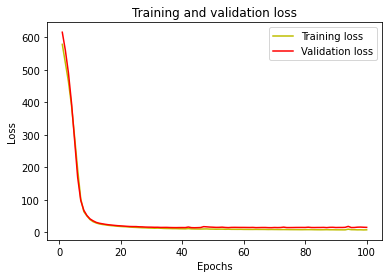

In [9]:
from matplotlib import pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [10]:
mse_neural, mae_neural = model.evaluate(X_test_scaled, y_test)
print('Mean squared error from neural net: ', mse_neural)
print('Mean absolute error from neural net: ', mae_neural)

4/4 [==============================] - 0s 3ms/step - loss: 25.3986 - mae: 3.0277
Mean squared error from neural net:  25.39859962463379
Mean absolute error from neural net:  3.027729034423828


In [11]:
predictions = model.predict(X_test_scaled[:5])
print("Predicted values are: ", predictions)
print("Real values are: ", y_test[:5])

1/1 [==============================] - 0s 193ms/step
Predicted values are:  [[ 8.819458]
 [19.006056]
 [21.222692]
 [31.06788 ]
 [24.723091]]
Real values are:  [ 7.2 18.8 19.  27.  22.2]


In [12]:
lr_model = linear_model.LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
print('Mean squared error from linear regression: ', mse_lr)
print('Mean absolute error from linear regression: ', mae_lr)

Mean squared error from linear regression:  23.195599256423
Mean absolute error from linear regression:  3.464185812406719
